# Manually setting the shared memory partition vs letting the compiler figure it out

In [1]:
import os
%cd ~/Desktop/Research/GPU-research/Preemptions/Xavier

custom_directory_path = 'FourCustomCapacity'
auto_directory_path = 'capacityData'
custom_paths = []
auto_paths = []

# List all files in the custom carveout directory
for filename in os.listdir(custom_directory_path):
  if filename == '.DS_Store':
    continue
  file_path = os.path.join(custom_directory_path, filename)
  if os.path.isfile(file_path):
      custom_paths.append(file_path)

# List all files in the auto carveout directory
for filename in os.listdir(auto_directory_path):
  if filename == '.DS_Store':
    continue
  file_path = os.path.join(auto_directory_path, filename)
  if os.path.isfile(file_path):
    auto_paths.append(file_path)

# Order the paths so that the arrays have the capacities in the same order for plotting
custom_paths = sorted(custom_paths)
auto_paths = sorted(auto_paths)
print(custom_paths)
print(auto_paths)

/Users/alexgeorgiev/Desktop/Research/GPU-research/Preemptions/Xavier
['FourCustomCapacity/CxavierSetSharedThree12th.csv', 'FourCustomCapacity/FxavierSetSharedSix12th.csv', 'FourCustomCapacity/IxavierSetSharedNine12th.csv', 'FourCustomCapacity/LxavierSetSharedTwelve12th.csv']
['capacityData/AxavierShared25P.csv', 'capacityData/BxavierShared50P.csv', 'capacityData/CxavierShared75P.csv', 'capacityData/DxavierShared100P.csv']


### Load in the data

In [2]:
import numpy as np
%cd ~/Desktop/Research/GPU-research/Preemptions
from analyzer_functions import *
%cd ~/Desktop/Research/GPU-research/Preemptions/Xavier

# Store all of the intervals in arrays
auto_ivls_array = []
custom_ivls_array = []

for auto_path, custom_path in zip(auto_paths, custom_paths):
  # load in the data and calculate the preemption and execution intervals
  auto_ivls, custom_ivls = data_loader(noSharedPath=auto_path, sharedPath=custom_path, onlyPreemptIvls=True)

  # convert to microseconds
  auto_ivls = np.array(auto_ivls) / 1000
  custom_ivls = np.array(custom_ivls) / 1000

  # append to the interval arrays
  auto_ivls_array.append(auto_ivls)
  custom_ivls_array.append(custom_ivls)

/Users/alexgeorgiev/Desktop/Research/GPU-research/Preemptions
/Users/alexgeorgiev/Desktop/Research/GPU-research/Preemptions/Xavier


## Plot the median lines

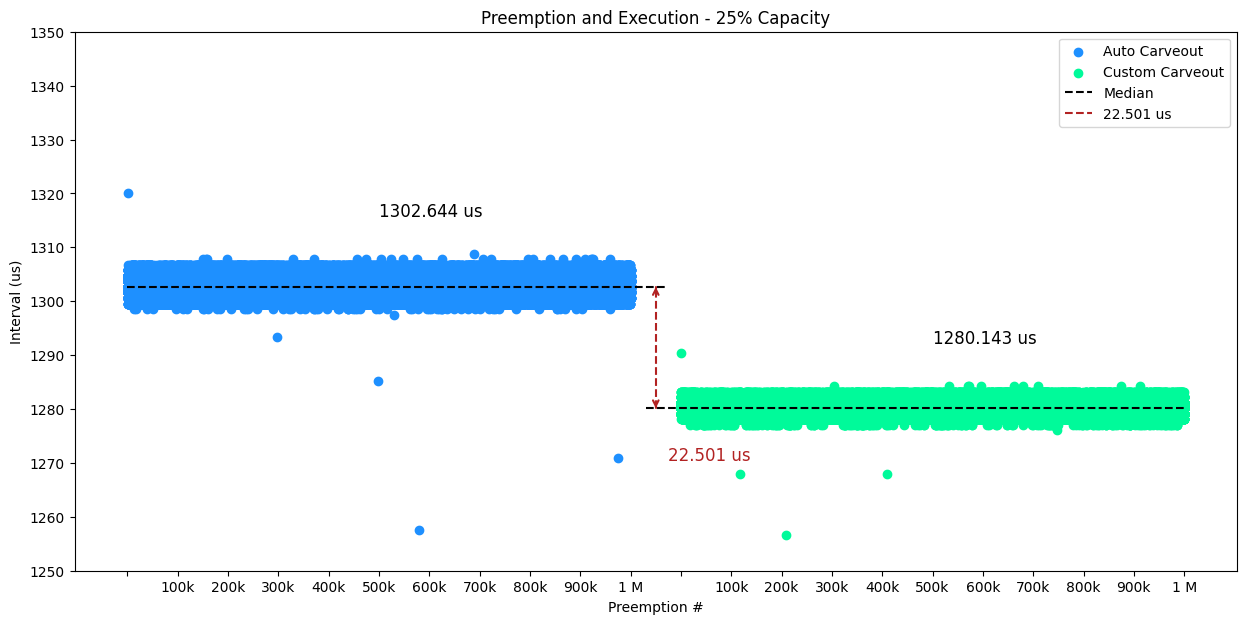

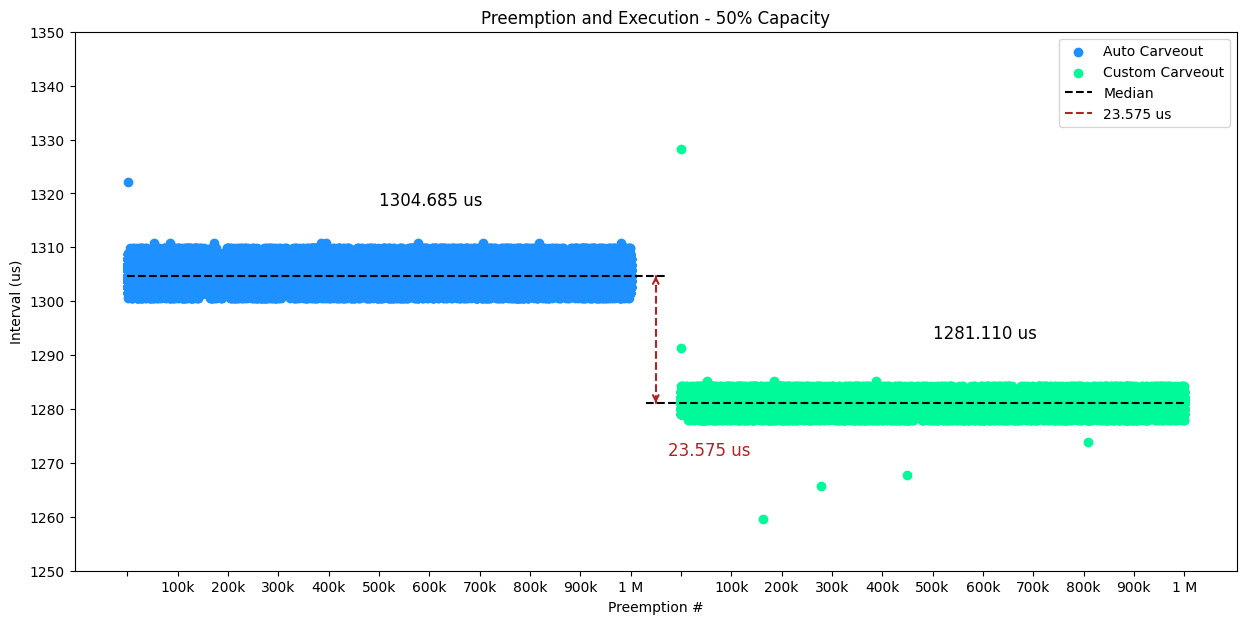

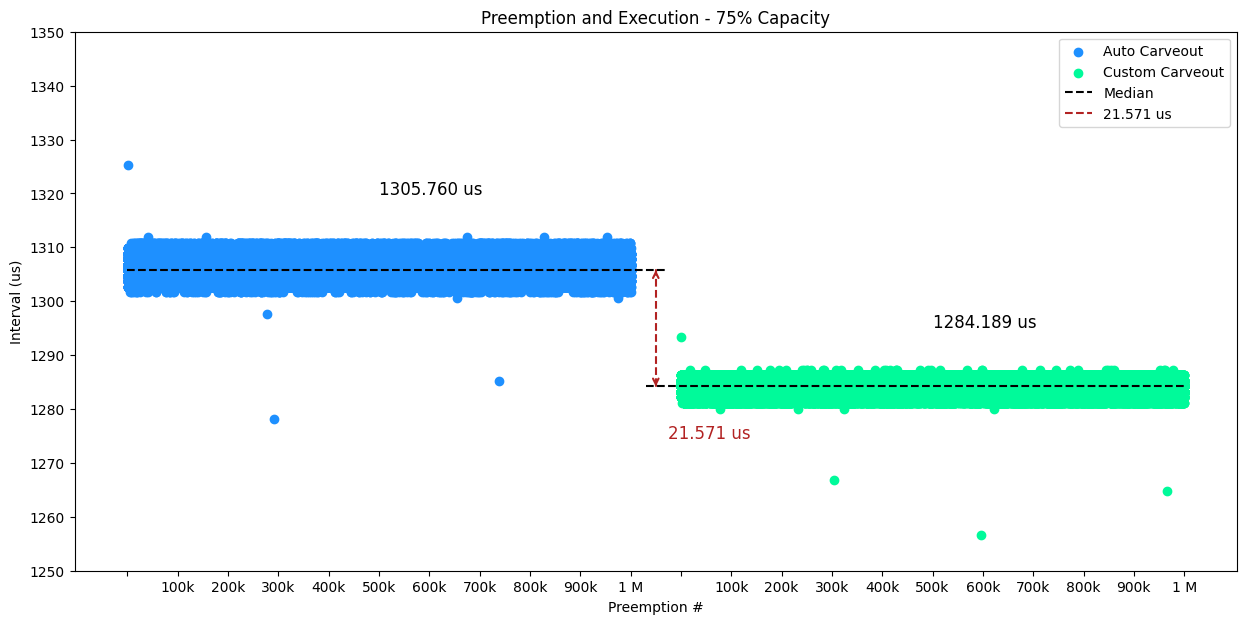

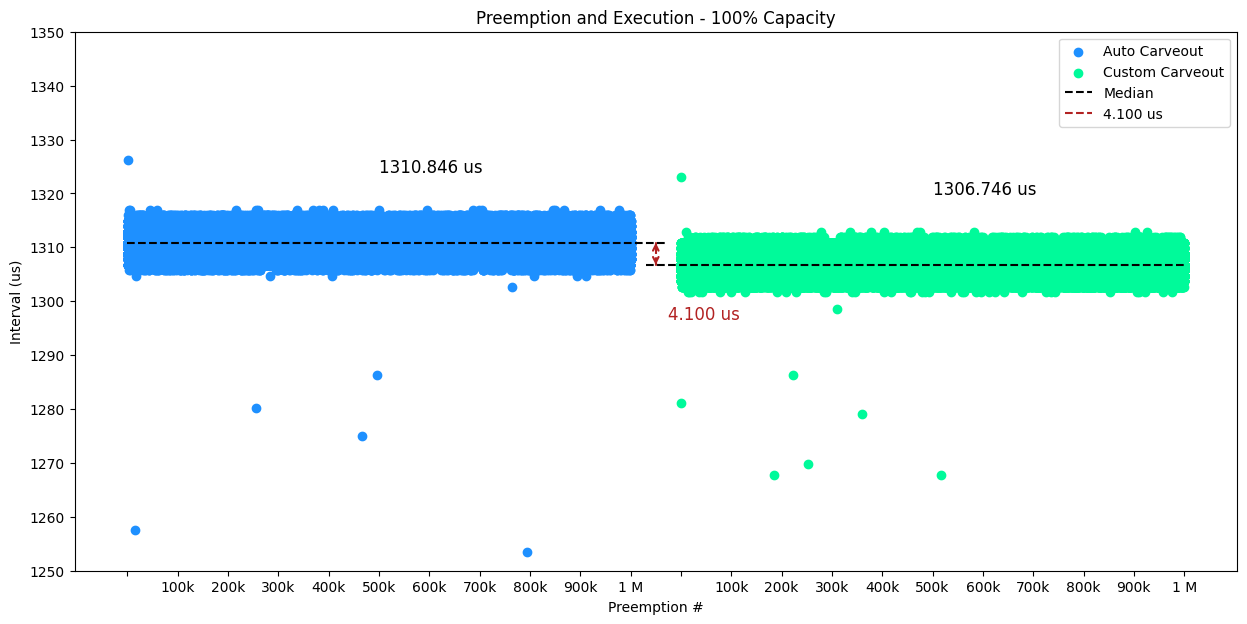

In [3]:
percentages = [25, 50, 75, 100]
NUM_SAMPLES = 1000000
offset = NUM_SAMPLES // 10
for auto_ivls, custom_ivls, per in zip(auto_ivls_array, custom_ivls_array, percentages):
  plot_side_by_side(noSharedData=auto_ivls, sharedData=custom_ivls, NUM_SAMPLES=NUM_SAMPLES, 
    firstLabel='Auto Carveout', secondLabel='Custom Carveout', lowerBound=1250, upperBound=1350, medianLines=True, offset=offset, perCap=per, medianOffset=10, medianImpute=True)

## Worst-case bounds with median imputation

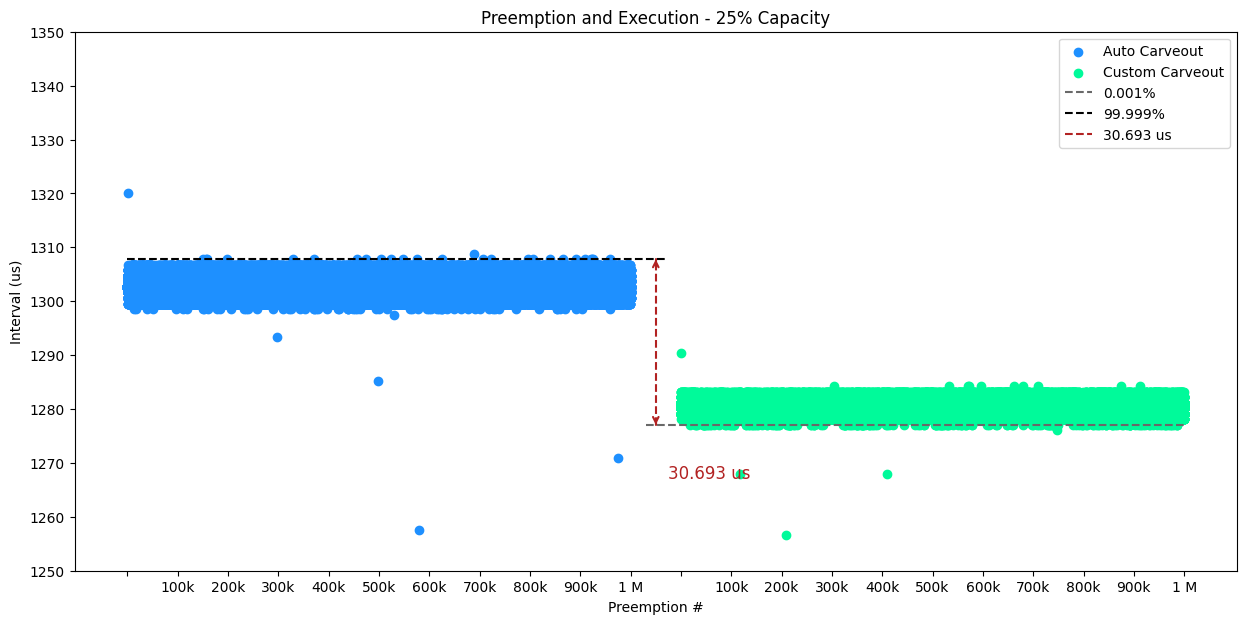

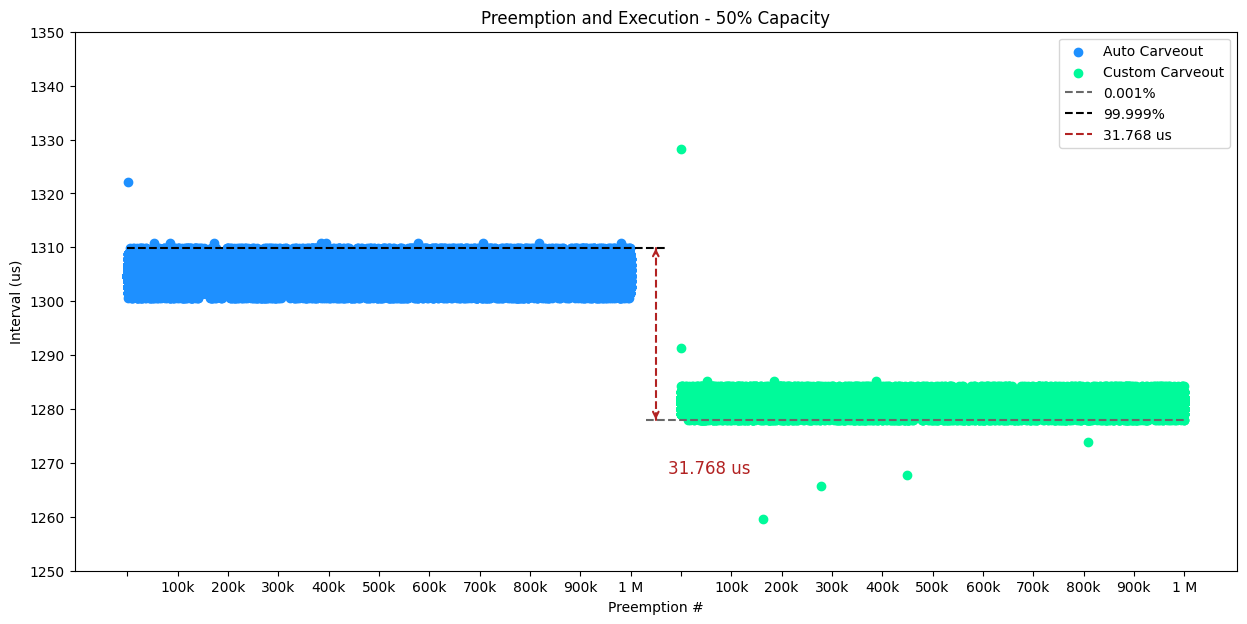

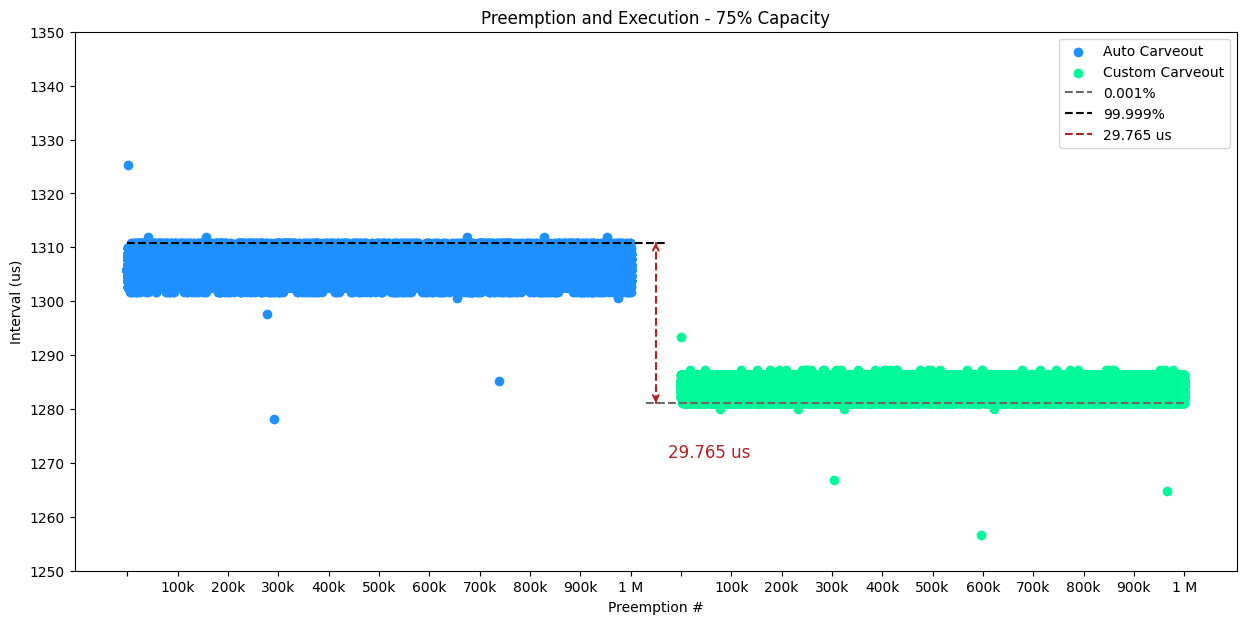

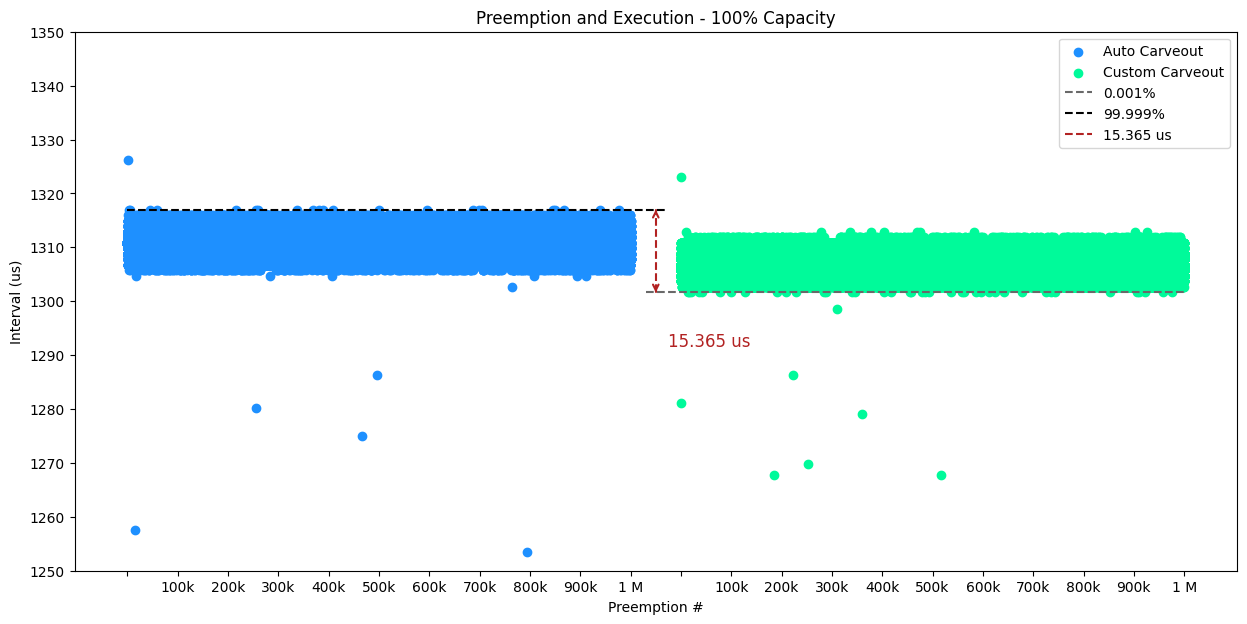

In [4]:
for auto_ivls, custom_ivls, per in zip(auto_ivls_array, custom_ivls_array, percentages):
  plot_side_by_side(noSharedData=auto_ivls, sharedData=custom_ivls, NUM_SAMPLES=NUM_SAMPLES, 
    firstLabel='Auto Carveout', secondLabel='Custom Carveout', lowerBound=1250, upperBound=1350, worstCaseLines=True, medianImpute=True, percent=99.999, offset=offset, blockOffset=10, perCap=per)

## Variational bounds with median imputation

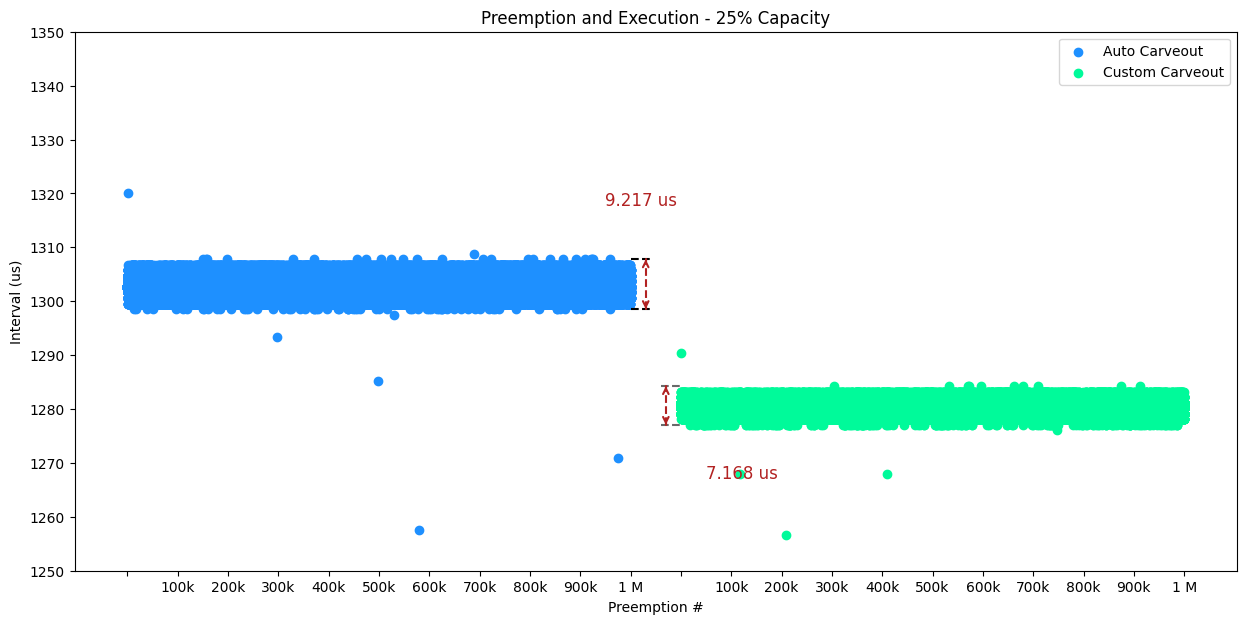

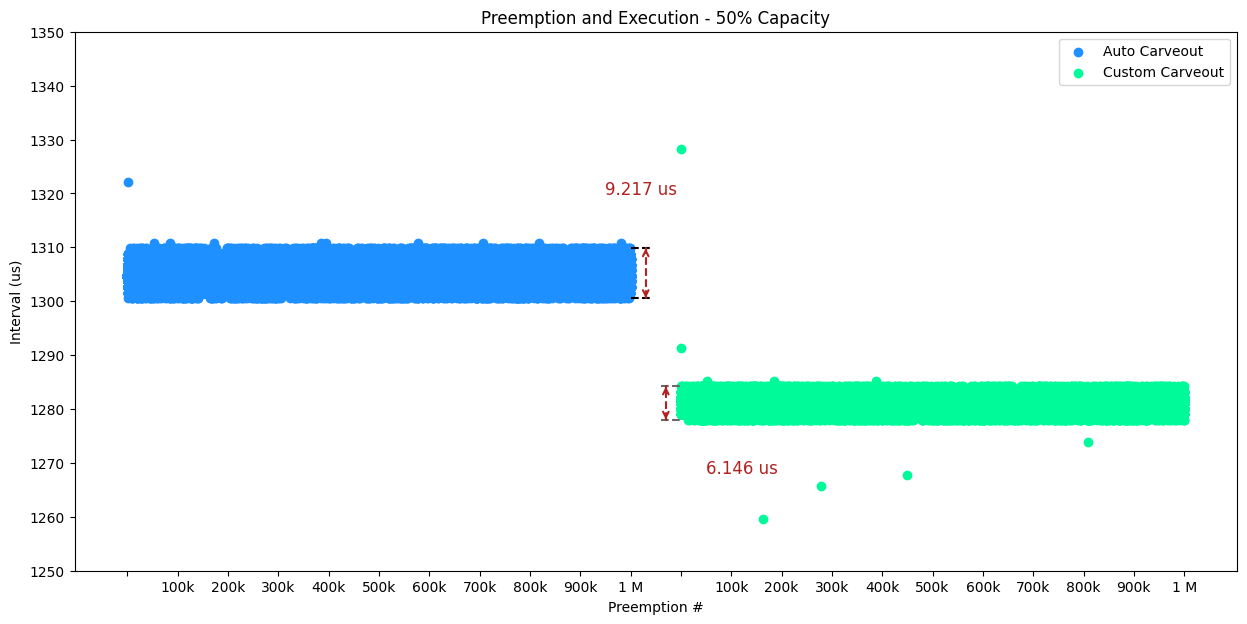

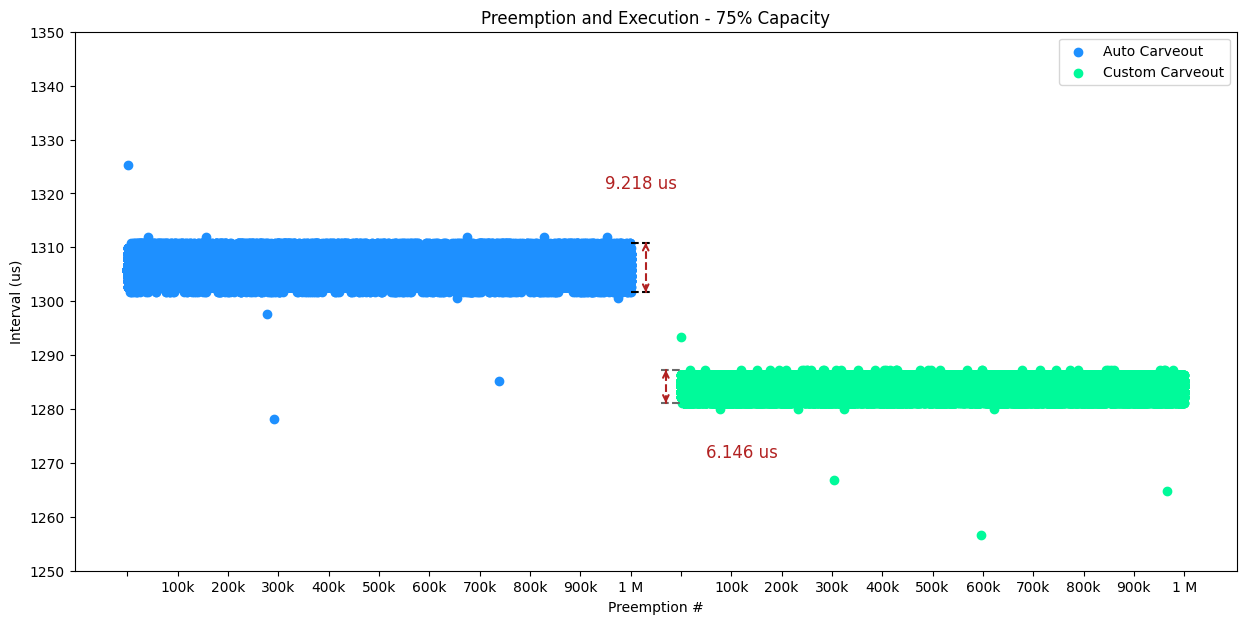

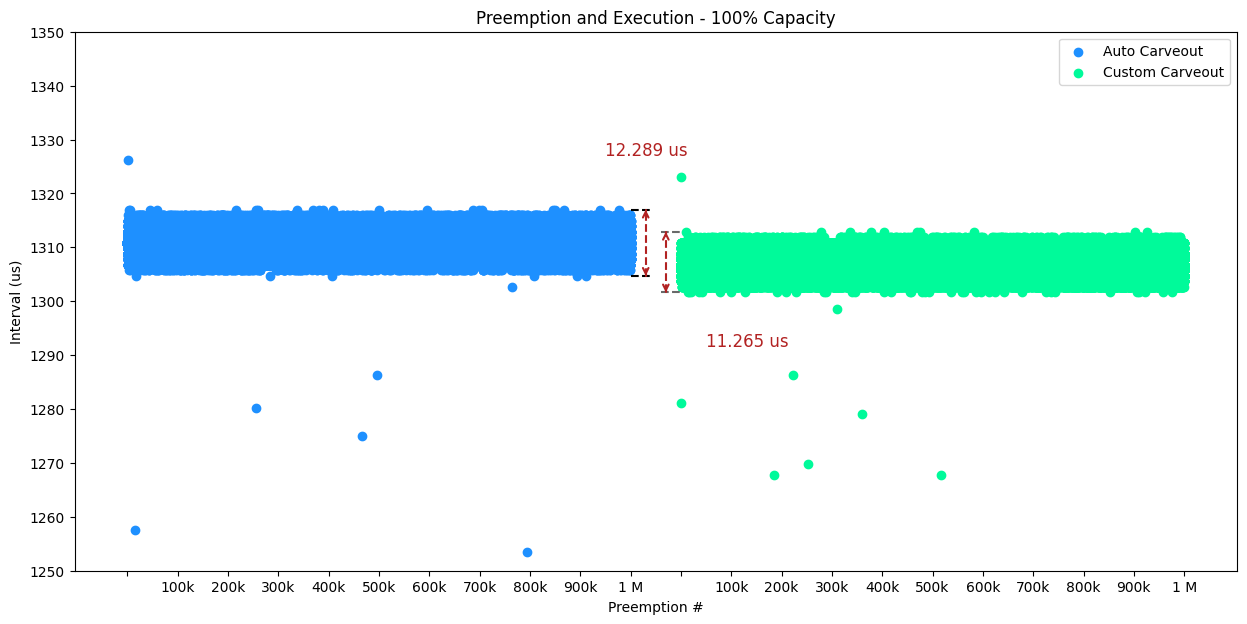

In [5]:
for auto_ivls, custom_ivls, per in zip(auto_ivls_array, custom_ivls_array, percentages):
  plot_side_by_side(noSharedData=auto_ivls, sharedData=custom_ivls, NUM_SAMPLES=NUM_SAMPLES, 
    firstLabel='Auto Carveout', secondLabel='Custom Carveout', lowerBound=1250, upperBound=1350, blockLines=True, medianImpute=True, percent=99.999, offset=offset, blockOffset=100000, perCap=per)